In [1]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats 

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
# Create an empty Bayesian Network
bn = gum.BayesNet('MotorcycleAnalysis')

# Create the nodes
motorcycle_type = bn.add(gum.LabelizedVariable('motorcycle_type', 'Motorcycle Type', ['Cruiser', 'Dual-Sport', 'Sport', 'Standard','Touring' ]))
engine_size = bn.add(gum.LabelizedVariable('engine_size', 'Engine Size', ['Small', 'Medium', 'Large']))
weight = bn.add(gum.LabelizedVariable('weight', 'Weight', ['Light', 'Medium', 'Heavy']))
#speed = bn.add(gum.LabelizedVariable('speed', 'Speed', ['Slow', 'Medium', 'Fast']))
speed = bn.add(gum.LabelizedVariable('speed', 'Speed', ['Slow', 'Medium', 'Fast']))
power = bn.add(gum.LabelizedVariable('power', 'Power', ['Low', 'Medium', 'High']))
emissions = bn.add(gum.LabelizedVariable('emissions', 'Emmissions', ['Euro 2', 'Euro 3', 'Euro 4', 'Euro 5']))

# Add the edges
bn.addArc(motorcycle_type, engine_size)
bn.addArc(motorcycle_type, weight)
bn.addArc(motorcycle_type, power)
bn.addArc(power, speed)
bn.addArc(power, emissions)
bn.addArc(engine_size, power)
bn.addArc(engine_size, emissions)
bn.addArc(weight, speed)

# Print the created Bayesian Network
print(bn)


BN{nodes: 6, arcs: 8, domainSize: 1620, dim: 99, mem: 1Ko 120o}


In [3]:
bn

(pyAgrum.BayesNet<double>@000001DC44B6BDD0) BN{nodes: 6, arcs: 8, domainSize: 1620, dim: 99, mem: 1Ko 120o}

In [4]:
bn.cpt("motorcycle_type").fillWith([0.2565, 0.1863, 0.2071, 0.2384, 0.1117])

(pyAgrum.Potential<double>@000001DC44B00610) 
  motorcycle_type                                |
Cruiser  |Dual-Spor|Sport    |Standard |Touring  |
---------|---------|---------|---------|---------|
 0.2565  | 0.1863  | 0.2071  | 0.2384  | 0.1117  |

In [5]:
bn.cpt("weight").names

bn.cpt("weight")[:]=[[0.4469,0.4604,0.0928],
                     [0.9054,0.0922,0.0024],
                     [0.9360,0.0618,0.0022],
                     [0.9261,0.0720,0.0019],
                     [0.3976,0.3208,0.2817]]

In [6]:
bn.cpt('weight')

(pyAgrum.Potential<double>@000001DC44B00930) 
      ||  weight                     |
motorc||Light    |Medium   |Heavy    |
------||---------|---------|---------|
Cruise|| 0.4469  | 0.4604  | 0.0928  |
Dual-S|| 0.9054  | 0.0922  | 0.0024  |
Sport || 0.9360  | 0.0618  | 0.0022  |
Standa|| 0.9261  | 0.0720  | 0.0019  |
Tourin|| 0.3976  | 0.3208  | 0.2817  |

In [7]:
bn.cpt("engine_size").names

('engine_size', 'motorcycle_type')

In [8]:
bn.cpt("engine_size")[:]=[[0.1850,0.2396,0.5755],
                          [0.1657,0.4479,0.3864],
                          [0.1913,0.2393,0.5695],
                          [0.0929,0.3253,0.5818],
                          [0.0418,0.1995,0.7588]]

In [9]:
bn.cpt("engine_size")

(pyAgrum.Potential<double>@000001DC44B006D0) 
      ||  engine_size                |
motorc||Small    |Medium   |Large    |
------||---------|---------|---------|
Cruise|| 0.1850  | 0.2396  | 0.5755  |
Dual-S|| 0.1657  | 0.4479  | 0.3864  |
Sport || 0.1913  | 0.2393  | 0.5695  |
Standa|| 0.0929  | 0.3253  | 0.5818  |
Tourin|| 0.0418  | 0.1995  | 0.7588  |

In [10]:
bn.cpt("power").names

('power', 'motorcycle_type', 'engine_size')

In [11]:
bn.cpt("power")[{'engine_size': 'Small', 'motorcycle_type': 'Cruiser'}] = [1.0000, 0.0000, 0.0000]
bn.cpt("power")[{'engine_size': 'Small', 'motorcycle_type': 'Dual-Sport'}] = [1.0000, 0.0000, 0.0000]
bn.cpt("power")[{'engine_size': 'Small', 'motorcycle_type': 'Sport'}] = [1.0000, 0.0000, 0.0000]
bn.cpt("power")[{'engine_size': 'Small', 'motorcycle_type': 'Standard'}] = [1.0000, 0.0000, 0.0000]
bn.cpt("power")[{'engine_size': 'Small', 'motorcycle_type': 'Touring'}] = [1.0000, 0.0000, 0.0000]
bn.cpt("power")[{'engine_size': 'Medium', 'motorcycle_type': 'Cruiser'}] = [0.9926, 0.0074, 0.0000]
bn.cpt("power")[{'engine_size': 'Medium', 'motorcycle_type': 'Dual-Sport'}] =  [0.9982, 0.0018, 0.0000]
bn.cpt("power")[{'engine_size': 'Medium', 'motorcycle_type': 'Sport'}] = [0.3891, 0.6109, 0.0000]
bn.cpt("power")[{'engine_size': 'Medium', 'motorcycle_type': 'Standard'}] =  [0.7165, 0.2835, 0.0000]
bn.cpt("power")[{'engine_size': 'Medium', 'motorcycle_type': 'Touring'}] =  [0.6284, 0.3716, 0.0000]
bn.cpt("power")[{'engine_size': 'Large', 'motorcycle_type': 'Cruiser'}] =  [0.7337, 0.2643, 0.0020]
bn.cpt("power")[{'engine_size': 'Large', 'motorcycle_type': 'Dual-Sport'}] = [0.3577, 0.6423, 0.0000]
bn.cpt("power")[{'engine_size': 'Large', 'motorcycle_type': 'Sport'}] =  [0.1098, 0.6450, 0.2452]
bn.cpt("power")[{'engine_size': 'Large', 'motorcycle_type': 'Standard'}] = [0.2790, 0.6699, 0.0510]
bn.cpt("power")[{'engine_size': 'Large', 'motorcycle_type': 'Touring'}] = [0.3448, 0.6207, 0.0345]

In [12]:
bn.cpt("power")

(pyAgrum.Potential<double>@000001DC44B00B70) 
             ||  power                      |
motorc|engine||Low      |Medium   |High     |
------|------||---------|---------|---------|
Cruise|Small || 1.0000  | 0.0000  | 0.0000  |
Dual-S|Small || 1.0000  | 0.0000  | 0.0000  |
Sport |Small || 1.0000  | 0.0000  | 0.0000  |
Standa|Small || 1.0000  | 0.0000  | 0.0000  |
Tourin|Small || 1.0000  | 0.0000  | 0.0000  |
Cruise|Medium|| 0.9926  | 0.0074  | 0.0000  |
[...3 more line(s) ...]
Tourin|Medium|| 0.6284  | 0.3716  | 0.0000  |
Cruise|Large || 0.7337  | 0.2643  | 0.0020  |
Dual-S|Large || 0.3577  | 0.6423  | 0.0000  |
Sport |Large || 0.1098  | 0.6450  | 0.2452  |
Standa|Large || 0.2790  | 0.6699  | 0.0510  |
Tourin|Large || 0.3448  | 0.6207  | 0.0345  |

In [13]:
bn.cpt("speed")

(pyAgrum.Potential<double>@000001DC44B00810) 
             ||  speed                      |
power |weight||Slow     |Medium   |Fast     |
------|------||---------|---------|---------|
Low   |Light || 0.0000  | 0.0000  | 0.0000  |
Medium|Light || 0.0000  | 0.0000  | 0.0000  |
High  |Light || 0.0000  | 0.0000  | 0.0000  |
Low   |Medium|| 0.0000  | 0.0000  | 0.0000  |
Medium|Medium|| 0.0000  | 0.0000  | 0.0000  |
High  |Medium|| 0.0000  | 0.0000  | 0.0000  |
Low   |Heavy || 0.0000  | 0.0000  | 0.0000  |
Medium|Heavy || 0.0000  | 0.0000  | 0.0000  |
High  |Heavy || 0.0000  | 0.0000  | 0.0000  |

In [14]:
bn.cpt("speed")[{'weight': 'Light', 'power': 'Low'}] = [0.0128, 0.8328, 0.1545]
bn.cpt("speed")[{'weight': 'Light', 'power': 'Medium'}] = [0.0000, 0.0909, 0.9091]
bn.cpt("speed")[{'weight': 'Light', 'power': 'High'}] = [0.0000, 0.1705, 0.8295]
bn.cpt("speed")[{'weight': 'Medium', 'power': 'Low'}] = [0.0476, 0.8712, 0.0812]
bn.cpt("speed")[{'weight': 'Medium', 'power': 'Medium'}] = [0.0000, 0.2154, 0.7846]
bn.cpt("speed")[{'weight': 'Medium', 'power': 'High'}] = [0.0000, 0.0000, 1.0000]
bn.cpt("speed")[{'weight': 'Heavy', 'power': 'Low'}] = [0.2797, 0.7203, 0.0000]
bn.cpt("speed")[{'weight': 'Heavy', 'power': 'Medium'}] = [0.0000, 0.8814, 0.1186]
bn.cpt("speed")[{'weight': 'Heavy', 'power': 'High'}] = [0.0000, 0.0000, 1.0000]

In [15]:
bn.cpt('emissions')

(pyAgrum.Potential<double>@000001DC44B00BD0) 
             ||  emissions                            |
power |engine||Euro 2   |Euro 3   |Euro 4   |Euro 5   |
------|------||---------|---------|---------|---------|
Low   |Small || 0.0000  | 0.0000  | 0.0000  | 0.0000  |
Medium|Small || 0.0000  | 0.0000  | 0.0000  | 0.0000  |
High  |Small || 0.0000  | 0.0000  | 0.0000  | 0.0000  |
Low   |Medium|| 0.0000  | 0.0000  | 0.0000  | 0.0000  |
Medium|Medium|| 0.0000  | 0.0000  | 0.0000  | 0.0000  |
High  |Medium|| 0.0000  | 0.0000  | 0.0000  | 0.0000  |
Low   |Large || 0.0000  | 0.0000  | 0.0000  | 0.0000  |
Medium|Large || 0.0000  | 0.0000  | 0.0000  | 0.0000  |
High  |Large || 0.0000  | 0.0000  | 0.0000  | 0.0000  |

In [16]:
bn.cpt("emissions")[{'engine_size': 'Small', 'power': 'Low'}] = [0.0283, 0.3725, 0.5628, 0.0364]
bn.cpt("emissions")[{'engine_size': 'Small', 'power': 'Medium'}] = [0.0000, 0.0000, 0.0000, 0.0000]
bn.cpt("emissions")[{'engine_size': 'Small', 'power': 'High'}] = [0.0000, 0.0000, 0.0000, 0.0000]
bn.cpt("emissions")[{'engine_size': 'Medium', 'power': 'Low'}] = [0.0000, 0.4608, 0.3529, 0.1863]
bn.cpt("emissions")[{'engine_size': 'Medium', 'power': 'Medium'}] = [0.0000, 0.1400, 0.5914, 0.2686]
bn.cpt("emissions")[{'engine_size': 'Medium', 'power': 'High'}] = [0.0000, 0.0000, 0.0000, 0.0000]
bn.cpt("emissions")[{'engine_size': 'Large', 'power': 'Low'}] = [0.0000, 0.3052, 0.4957, 0.1991]
bn.cpt("emissions")[{'engine_size': 'Large', 'power': 'Medium'}] = [0.0000, 0.4721, 0.4432, 0.0847]
bn.cpt("emissions")[{'engine_size': 'Large', 'power': 'High'}] = [0.0000, 0.3879, 0.4626, 0.1495]

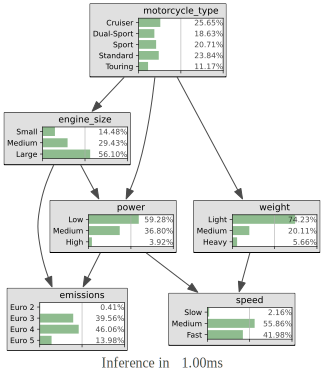

In [17]:
gnb.showInference(bn,evs={})

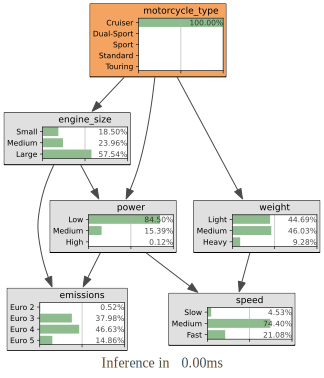

In [18]:
gnb.showInference(bn,evs={'motorcycle_type':'Cruiser'})

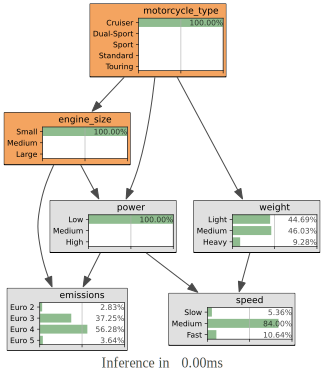

In [19]:
gnb.showInference(bn,evs={'motorcycle_type':'Cruiser', 'engine_size': 'Small'})

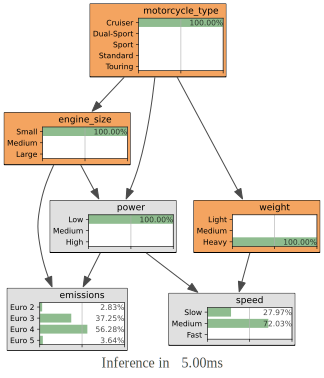

In [23]:
gnb.showInference(bn,evs={'motorcycle_type':'Cruiser', 'engine_size': 'Small', 'weight': 'Heavy'})

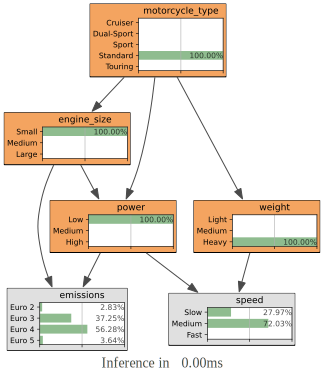

In [21]:
gnb.showInference(bn,evs={'motorcycle_type':'Standard', 'engine_size': 'Small', 'power': 'Low', 'weight': 'Heavy'})